## 그리드 서치
* 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요하다.
* 모델에서 중요한 매개변수의 값을 찾는 일은 어려운 작업이지만, 모든 모델과 데이터셋에서 해야 하는 필수적인 일.

### 간단한 그리드 서치

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print('train set size: {}   test set size: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_paramters = {'C': C, 'gamma': gamma}

print('best score: {}'.format(best_score))
print('best parameters:', best_paramters)

train set size: 112   test set size: 38
best score: 0.9736842105263158
best parameters: {'C': 100, 'gamma': 0.001}


### 매개변수 과대적합과 검증 세트

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


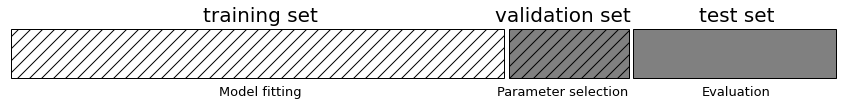

In [2]:
import mglearn

mglearn.plots.plot_threefold_split()

In [7]:
from sklearn.svm import SVC

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print('trainset size: {},   validset size: {},   testset size: {}\n'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svc = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('validation set best score: {}'.format(best_score))
print('best parameters:', best_parameters)
print('best parameters test set score: {}'.format(test_score))

trainset size: 84,   validset size: 28,   testset size: 38

validation set best score: 0.9642857142857143
best parameters: {'C': 10, 'gamma': 0.001}
best parameters test set score: 0.4473684210526316


### 교차 검증을 사용한 그리드 서치

In [8]:
import numpy as np
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

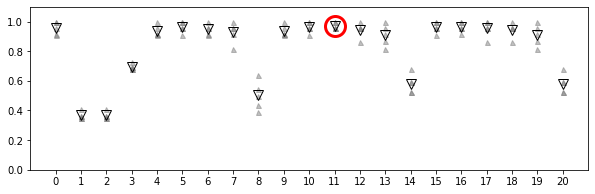

In [11]:
mglearn.plots.plot_cross_val_selection()

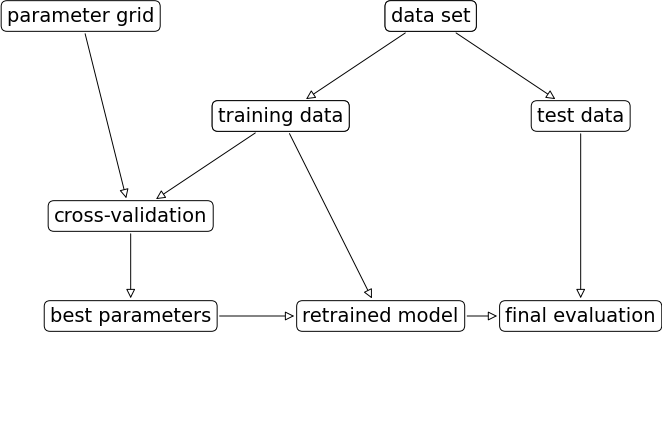

In [12]:
mglearn.plots.plot_grid_search_overview()

In [13]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print(f'parameters grid:\n{param_grid}')

parameters grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [19]:
print(f'test set score: {grid_search.score(X_test, y_test)}')

test set score: 0.9736842105263158


In [20]:
print('best parameters:', grid_search.best_params_)
print(f'best cross validation score: {grid_search.best_score_}')

best parameters: {'C': 10, 'gamma': 0.1}
best cross validation score: 0.9731225296442687


In [21]:
print(f'best model:\n{grid_search.best_estimator_}')

best model:
SVC(C=10, gamma=0.1)


* 교차 검증 결과 분석
    * 그리드 서치는 연산 비용이 매우 크므로 비교적 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋다.
    * 교차 검증된 그리드 서치의 결과를 분석하여 검색을 확장해나갈 수 있다.

In [22]:
import pandas as pd

pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
np.transpose(results.head())

,0,1,2,3,4
mean_fit_time,0.000200033,0.000199556,0.000410414,0.00039916,0.000407028
std_fit_time,0.000400066,0.000399113,0.000499243,0.000488873,0.000376426
mean_score_time,0,0.000199747,0.000200462,0,0
std_score_time,0,0.000399494,0.000400925,0,0
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


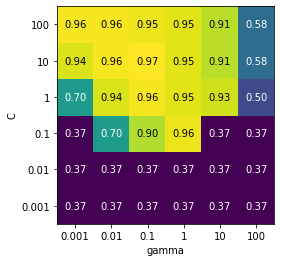

In [23]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

* 히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타낸다.
* 교차 검증의 정확도가 높으면 밟은 색, 낮으면 어두운 색.
* 그래프를 보면 SVC가 매개변수 설정에 매우 민감함을 알 수 있다.
* 높은 성능을 얻으려면 매개변수 조정이 매우 중요하다.
* 각 매개변수의 최적값이 그래프 끝에 놓이지 않도록 매개변수의 범위가 충분히 넓다.

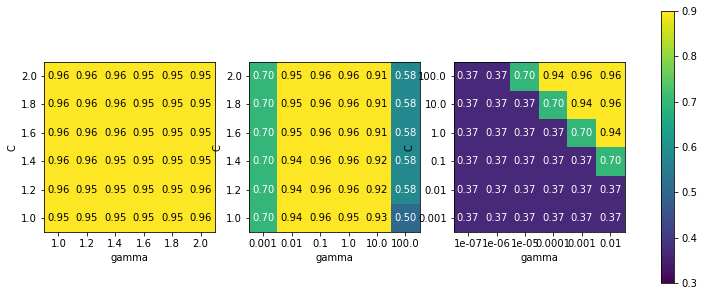

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis', ax=ax, vmin=0.3, vmax=0.9
    )
plt.colorbar(scores_image, ax=axes.tolist())

* 첫 번째 그래프는 점수 번화가 전혀 없어서 매개변수 그리드가 같은 색.
    * 매개변수 C와 gamma의 스케일과 범위가 부적절할 때 발생.
    * 매개변수 설정이 바뀌어도 정확도에 아무런 변화가 없다면, 그 매개변수가 전혀 중요하지 않은 것일 수도 있다.
    * 처음에는 매우 극단적인 값을 적용해보고, 매개변수를 바꿔가며 정확도가 변하는지 살펴보는 것이 좋다.
* 두 번째 그래프는 세로 띠 형태를 보인다.
    * gamma 매개변수만 정확도에 영향을 준다는 뜻.
    * gamma 매개변수는 적절한 범위를 탐색하고 있지만, C 매개변수는 그렇지 못하든지, 아니면 중요한 매개변수가 아닐 수 있다.
* 데 번째 그래프는 C와 gamma 둘 모두에 따라 값이 변했다.
    * 그래프의 왼쪽 아래 영역에서는 아무런 변화가 없다.
    * 아마도 다음 번 검색 땐 매개변수 그리드에서 매우 작은 단위는 제외될 것이다.
    * 최적치가 그래프의 경계에 있으니 이 경계 너머에 더 나은 값이 있다고 생각할 수 있다.

* 비대칭 매개변수 그리드 탐색

In [27]:
param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]
print(f'grid list\n{param_grid}')

grid list
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [28]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('best parameter:', grid_search.best_params_)
print(f'best score: {grid_search.best_score_}')

best parameter: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
best score: 0.9731225296442687


In [30]:
results = pd.DataFrame(grid_search.cv_results_)
results.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00039916,0.000103283,0.000198698,0.000399351,0.000446367,0.000399971,0.000300646,0.000200701,0.000399065,0.000102091,0.000700569,0.000200129,0,0.000302172,0.000337648,0.000600004,0.000205326,0,0.000308371,0.000303125,0.000199413,0.000198984,0.000399017,0.000399876,0.000200081,0.000199986,0.000402975,0.000200033,0.000398302,0.00107284,0.000199652,0.000200033,0.000198889,0.000400019,0.000399542,0.000102091,0.000399256,0.00010252,0.000198936,0.000104713,0.000199366,0.000199366
std_fit_time,0.00048887,0.000206566,0.000397396,0.000489104,0.000551974,0.000489863,0.000398843,0.000397005,0.000488755,0.000204182,0.000397608,0.000400257,0,0.000401207,0.00042422,0.000489901,0.000251477,0,0.000403583,0.000401764,0.000398827,0.000397968,0.000488696,0.000489748,0.000400162,0.000399971,0.000493563,0.000400066,0.000487828,0.000148212,0.000399303,0.000400066,0.000397778,0.000489921,0.000489339,0.000204182,0.000488987,0.00020504,0.000397873,0.000209427,0.000398731,0.000398731
mean_score_time,0.000127649,0.000200081,0.000199938,0.000200224,0.00019865,0.0004004,0.000200081,0,0,0.000302219,0,0.000702238,0.000301743,0.000102472,0,0,0.000397921,0.000101471,0.000200224,0,0,0,0,0.000704288,0,0.000199175,0,0.000200033,0.000199795,0,0.000202036,0.000110006,0,0,0.00024395,0,0,0,0,0.000200081,0.000284767,0.000202179
std_score_time,0.000255299,0.000400162,0.000399876,0.000400448,0.000397301,0.000490388,0.000400162,0,0,0.000401057,0,0.000396393,0.000400926,0.000204945,0,0,0.000487353,0.000202942,0.000400448,0,0,0,0,0.000399961,0,0.00039835,0,0.000400066,0.00039959,0,0.000404072,0.000220013,0,0,0.0004879,0,0,0,0,0.000400162,0.000569534,0.000404358
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0

* 그리드 서치에 다양한 교차 검증 적용
* 중첩 교차 검증 (nested cross-validation)

In [31]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print('score:', scores)
print(f'mean score:{scores.mean()}')

score: [0.96666667 1.         0.96666667 0.96666667 1.        ]
mean score:0.9800000000000001


* 교차 검증과 그리드 서치 병렬화
    * 데이터셋과 모델이 매우 클 때는 여러 코어를 사용하면 너무 많은 메모리를 차지한다.
    * 대규모 모델을 병렬로 만들 땐 메모리 사용 현황을 모니터링하는 것이 좋다.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

param_dist = [
    {'kernel': ['rbf'], 'C': loguniform(0.001, 100), 'gamma': loguniform(0.001, 100)},
    {'kernel': ['linear'], 'C': loguniform(0.001, 100)}
]

In [33]:
rand_search = RandomizedSearchCV(SVC(), param_dist, n_iter=20, random_state=42, n_jobs=-1)
rand_search.fit(X_train, y_train)
print('best parameters:', rand_search.best_params_)
print(f'best score: {rand_search.best_score_}')

best parameters: {'C': 1.7965626423790642, 'kernel': 'linear'}
best score: 0.9731225296442687
